In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('world-happiness-report-2021.csv')

In this notebook I aim to explore the USA's place in the latest World Happiness Report. While a country's GDP does play a role in the expected happiness, other factors can prove to be surprising in contrast. 

In [10]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [11]:
df.rename(columns={'Country name': 'Country', 'Regional indicator':'Regional', 
                      'Logged GDP per capita':'GDP'}, inplace=True)

"The rankings in Figure 2.1 of World Happiness Report 2021 use data that come from the Gallup World Poll surveys from 2018 to 2020. They are based on answers to the main life evaluation question asked in the poll. This is called the Cantril LADDER: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale."

-https://worldhappiness.report/faq/

In [12]:
top_10 = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]
top_10

Country
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
Norway         7.392
Sweden         7.363
Luxembourg     7.324
New Zealand    7.277
Austria        7.268
Name: Ladder score, dtype: float64

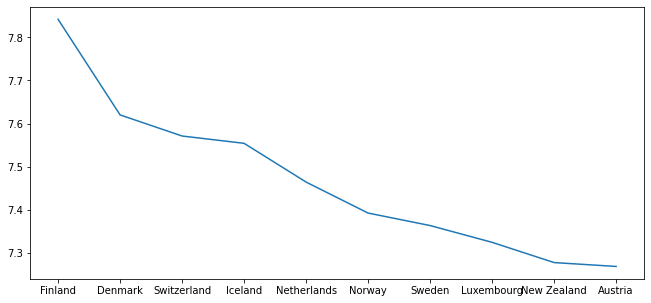

In [13]:
plt.figure(figsize=(11,5))
plt.plot(top_10)

In [14]:
bottom_10 = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]
bottom_10

Country
Afghanistan    2.523
Zimbabwe       3.145
Rwanda         3.415
Botswana       3.467
Lesotho        3.512
Malawi         3.600
Haiti          3.615
Tanzania       3.623
Yemen          3.658
Burundi        3.775
Name: Ladder score, dtype: float64

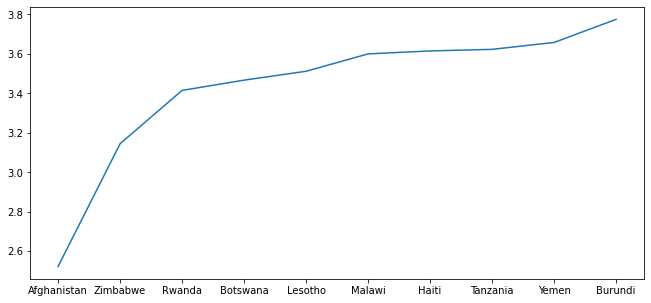

In [15]:
plt.figure(figsize=(11,5))
plt.plot(bottom_10)

In [16]:
df.loc[df['Country'] == 'United States']

,Country,Regional,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.92,68.2,0.837,0.098,0.698,2.43,1.533,1.03,0.621,0.554,0.252,0.154,2.807


In [19]:
top_gdp = df.sort_values('GDP', ascending=False)[:10]
top_gdp.reset_index(drop=True)

,Country,Regional,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
1,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
2,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
4,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.200,0.837,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
7,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
8,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
9,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


The US does not appear in the Top 10 happiest nations despite being ranked 7 in GDP.

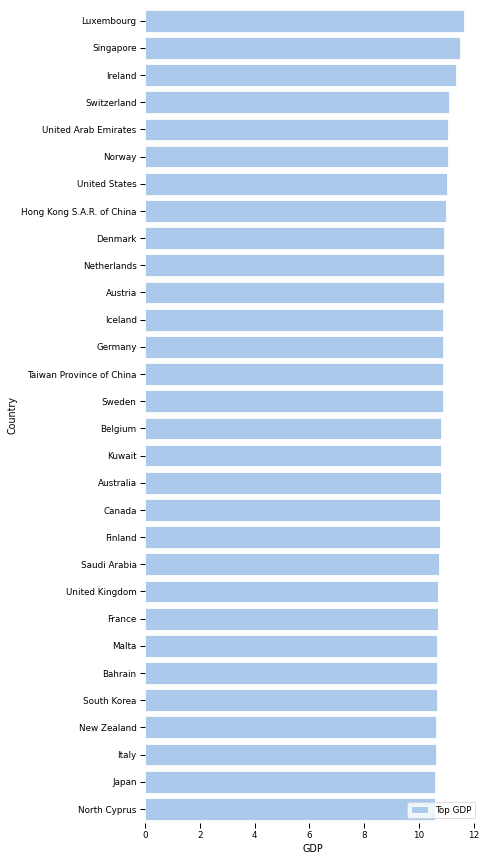

In [69]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'GDP', y = 'Country', data = top_gdp,
            label = 'Top GDP', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

I want to see how USA compares to best and worst nations in these specific measures. 

In [21]:
best_10 = df.sort_values('Ladder score', ascending=False).head(10).mean()[5:10]
best_10 = pd.DataFrame(best_10)
best_10 = best_10.rename(columns = {0:'Best 10'})
best_10

,Best 10
Social support,0.9453
Healthy life expectancy,72.9800
Freedom to make life choices,0.9331
Generosity,0.0613
Perceptions of corruption,0.3284


In [71]:
usa = df.loc[df['Country'] == 'United States'].mean()[5:10]
usa = pd.DataFrame(usa)
usa = usa.rename(columns = {0:'United States'})
usa

,United States
Social support,0.920
Healthy life expectancy,68.200
Freedom to make life choices,0.837
Generosity,0.098
Perceptions of corruption,0.698


In [72]:
worst_10 = df.sort_values('Ladder score', ascending=True).mean()[5:10]
worst_10 = pd.DataFrame(worst_10)
worst_10 = worst_10.rename(columns = {0:'Worst 10'})
worst_10

,Worst 10
Social support,0.814745
Healthy life expectancy,64.992799
Freedom to make life choices,0.791597
Generosity,-0.015134
Perceptions of corruption,0.727450


In [75]:
data_frames = best_10.join(usa, lsuffix=" Best 10", rsuffix=' United States')
data_frames = data_frames.join(worst_10, lsuffix=' United States', rsuffix=' Worst 10')
data_frames


,Best 10,United States,Worst 10
Social support,0.9453,0.920,0.814745
Healthy life expectancy,72.9800,68.200,64.992799
Freedom to make life choices,0.9331,0.837,0.791597
Generosity,0.0613,0.098,-0.015134
Perceptions of corruption,0.3284,0.698,0.727450


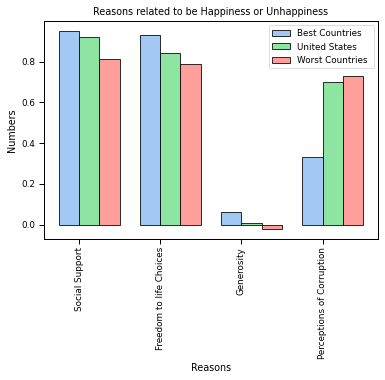

In [76]:
X = ['Social Support', 'Freedom to life Choices', 'Generosity', 'Perceptions of Corruption']
best = [0.95, 0.93,0.061,0.33]
usa = [0.92, 0.84,0.01,0.7]
worst = [0.81,0.79,-0.02,0.73]

n = 4
r = np.arange(n)
width = 0.25

plt.bar(r, best, color ='b', 
       width = width, edgecolor = 'black', 
       label = 'Best Countries')
plt.bar(r + width, usa, color = 'g',
       width = width, edgecolor ='black',
       label= 'United States')
plt.bar(r + width + width, worst, color = 'r', 
       width = width, edgecolor = 'black',
       label = 'Worst Countries ')


plt.xticks(r + width/2, X, rotation=90)
plt.xlabel('Reasons')
plt.ylabel('Numbers')
plt.title('Reasons related to be Happiness or Unhappiness')
plt.legend()
plt.show()

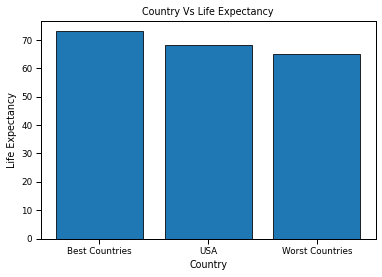

In [83]:
Country = ['Best Countries', 'USA', 'Worst Countries']
Life_expectancy = [72.98, 68.2, 65]

plt.bar(Country, Life_expectancy, edgecolor = 'black')
plt.title('Country Vs Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()

It is interesting to see that the USA, while amongst the elite in terms of GPD, looks more like a bottom 10 country when it comes to healthy life expectancy, freedom of life choices, and perceptions of corruption. This confirms what I would have expected because americans are known to have poor health as well as stress